<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-393 Máquinas de Aprendizaje II-2018 </h1>

<H3 align='center'> Tarea 2 - Fronteras no Lineales </H3>
<h4 align='center'>Gonzalo Larraín - 201673516-k</h4>
<h4 align='center'>Nicolás Pino - 201673534-8</h4>

<hr style="height:2px;border:none"/>

**Temas**  
* similaridad: KNN
* Selección de hı́per-parámetros estructurales en SVM, Arboles de Decisión, k-NN y Redes Neuronales.
* Métodos de *kernel*.
* Extracción de características.
* Múltiples anotaciones

** Formalidades **  
* Equipos de trabajo de: 2 personas (*cada uno debe estar en condiciones de realizar una presentación y discutir sobre cada punto del trabajo realizado*)
* Se debe preparar una presentación de 20 minutos. Presentador será elegido aleatoriamente.
* Se debe preparar un (breve) Jupyter/IPython notebook que explique la actividad realizada y las conclusiones del trabajo
* Fecha de discusión y entrega: 8 de Noviembre.
* Formato de entrega: envı́o de link Github al correo electrónico del ayudante (*<francisco.mena.13@sansano.usm.cl>*) , incluyendo al profesor en copia (*<jnancu@inf.utfsm.cl>*). Por favor especificar el siguiente asunto: [Tarea2-INF393-II-2018]

<hr style="height:2px;border:none"/>

### Paquetes de instalación

Como es usual utilizaremos *numpy, scipy, matplotlib* y *sklearn*. Además de éstas se necesitará instalar **keras**, una librerı́a en python para prototipado rápido de modelos basados en redes neuronales, muy similar en espı́ritu a *sklearn*. La librerı́a puede usar *TensorFlow* o *Theano* como backend, siendo éstas las librerı́as más populares para desarrollar nuevos modelos de redes neuronales o implementar eficientemente modelos conocidos con fines prácticos. Para detalles sobre la instalación puede revisar [[1]](#refs) o escribir un email a su ayudante.



La tarea se divide en secciones:

[1.](#primero) Sentiment Analysis en Texto  
[2.](#segundo) pendiente


<a id="primero"></a>
## 1. Sentiment Analysis en Texto

El análisis de emociones o sentimientos se refiere al proceso de extraer información acerca de la actitud
que una persona (o grupo de ellas) manifiesta, en un determinado medio o formato digital, con respecto a un
tópico o contexto de comunicación. Uno de los casos más estudiados corresponde a determinar la polaridad
de un trozo de texto, es decir, clasificar una determinada evaluación escrita (*review*), en que una persona
manifiesta una opinión, como *positiva*, *negativa* o *neutral*. Esto también ha sido extendido a otros medios, como lo es analizar la polaridad de textos en redes sociales.  La dificultad de este problema radica en el carácter altamente ambiguo e informal del lenguaje que utilizan naturalmente las personas ası́ como el manejo de negaciones, sarcasmo y abreviaciones en una frase.

<img src="https://formtitanhelpdeskimage.s3.amazonaws.com/70c78f9df2fd5c130e7021644f78f4c5.jpg" title="Title text" width="40%" />


Los datos que usaremos para esta actividad corresponden a un subconjunto de los datos publicados en **Kaggle**,  en  el  contexto  de  una  competencia  organizada  por  la  Universidad  de  Stanford  [[2]](#refs).   Cada  registro disponible corresponderá a una opinión sobre una película, registrada sobre el sitio *Rotten Tomatoes*.  Para empezar  nos  limitaremos  a  estudiar  textos  anotados  como  positivos  o  negativos,  clases  que  codificaremos como +1 y 0 respectivamente. Los datos pueden ser descargados ejecutando el siguiente código en sistema Unix:
```
wget -O train_data.csv http://www.inf.utfsm.cl/~jnancu/stanford-subset/polarity.train
wget -O test_data.csv http://www.inf.utfsm.cl/~jnancu/stanford-subset/polarity.dev
```




> Cargue los dos conjuntos de datos a ser trabajados, donde la etiqueta ya viene codificada y la dejaremos como negativo (0) y positivo (1).

In [1]:
import pandas as pd
ftr = open("train_data.csv", "r",  encoding="ISO-8859-1")
rows = [line.split(" ",1) for line in ftr.readlines()]
df_train = pd.DataFrame(rows, columns=['Sentiment','Text'])
df_train['Sentiment'] = (pd.to_numeric(df_train['Sentiment'])+1)/2 # 0 o 1
fts = open("test_data.csv", "r",  encoding="ISO-8859-1")
rows2 = [line.split(" ",1) for line in fts.readlines()]
df_test = pd.DataFrame(rows2, columns=['Sentiment','Text'])
df_test['Sentiment'] = (pd.to_numeric(df_test['Sentiment'])+1)/2 # 0 o 1
df_train_text = df_train.Text
df_test_text = df_test.Text
labels_train = df_train.Sentiment.values
labels_test = df_test.Sentiment.values

In [2]:
!pip install vaderSentiment

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


> a) Describa los datos trabajados, como la cantidad de datos en cada conjunto, largo de los textos, la cantidad de ejemplo por cada clase, o alguna otra forma que piense que pueda ser útil para comprender el problema trabajado.

In [3]:
df_test

,Sentiment,Text
0,0.0,screenwriter dan schneider and director shawn ...
1,0.0,"home alone goes hollywood , a funny premise un..."
2,1.0,seldom has a movie so closely matched the spir...
3,0.0,"less dizzying than just dizzy , the jaunt is p..."
4,0.0,an ultra-low-budget indie debut that smacks mo...
5,0.0,"at the very least , if you don't know anything..."
6,0.0,the problem is that the movie has no idea of i...
7,1.0,"a searing , epic treatment of a nationwide bli..."
8,1.0,visually striking and viscerally repellent .\n
9,1.0,noyce has worked wonders with the material .\n


In [4]:
prom_train_good=0
prom_train_bad=0
prom_test_good=0
prom_test_bad=0
for i in labels_train:
    if(i==1):
        prom_train_good+=1
    else:
        prom_train_bad+=1
for i in labels_test:
    if(i==1):
        prom_test_good+=1
    else:
        prom_test_bad+=1

print ("Total de críticas positivas en conjunto de entrenamiento:",prom_train_good)
print ("total de críticas negativas en conjunto de entrenamiento:",prom_train_bad)
print ("Total de críticas positivas en conjunto de test:",prom_test_good)
print ("Total de críticas negativas en conjunto de test:",prom_test_bad)
print ("Porcentaje de críticas positivas en train:",(prom_train_good/len(labels_train))*100,"Porcentaje negativo:",(prom_train_bad/len(labels_train))*100)
print ("Porcentaje de críticas positivas en test:",(prom_test_good/len(labels_train))*100,"Porcentaje negativo:",(prom_test_bad/len(labels_train))*100) 

Total de críticas positivas en conjunto de entrenamiento: 1770
total de críticas negativas en conjunto de entrenamiento: 1784
Total de críticas positivas en conjunto de test: 1751
Total de críticas negativas en conjunto de test: 1803
Porcentaje de críticas positivas en train: 49.8030388294879 Porcentaje negativo: 50.1969611705121
Porcentaje de críticas positivas en test: 49.26842993809792 Porcentaje negativo: 50.73157006190209


> b) Construya un conjunto de validación desde el conjunto de entrenamiento para seleccionar modelos. Decida el tamaño dada la cantidad de ejemplos que se tienen para entrenamiento.


In [5]:
from sklearn.model_selection import train_test_split
df_train_text, df_val_text, labels_train, labels_val  = train_test_split(df_train_text, labels_train, test_size= 0.2, random_state=0)


> c) Realice un pre-procesamiento a los textos para normalizar un poco su estructura, para ello utilice el código de ejemplo a continuación, donde se pasa el texto a minúsculas (lower-casing), se reducen las mútliples letras, se eliminan palabras sin significados como artículos, pronombres y preposiciones (stop word removal [3]), además de pasar las palabras a su tronco léxico con la técnica de lemmatizer [4]. Comente la importancia de un correcto pre-procesamiento en el domino de lenguaje natural.

In [6]:
import re, time
import nltk
import numpy as np
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer, word_tokenize
def base_word(word):
    wordlemmatizer = WordNetLemmatizer()
    return wordlemmatizer.lemmatize(word) 
def word_extractor(text):
    commonwords = stopwords.words('english')
    text = re.sub(r'([a-z])\1+', r'\1\1',text) #substitute multiple letter by two
    words = ""
    wordtokens = [ base_word(word.lower()) for word in word_tokenize(text) ]
    for word in wordtokens:
        if word not in commonwords: #delete stopwords
            words+=" "+word
    return words
... #try yourself
word_extractor("I love to eat cake")
word_extractor("I love eating cake")
word_extractor("I loved eating the cake")
word_extractor("I do not love eating cake")
word_extractor("I don't love eating cake")
... #try yourself
texts_train = [word_extractor(text) for text in df_train_text]
texts_val = [word_extractor(text) for text in df_val_text]
texts_test = [word_extractor(text) for text in df_test_text]
original_train_set = np.concatenate((texts_train, texts_val)) #Tener el conjunto original de datos para apartado K
original_labels_train = np.concatenate((labels_train, labels_val)) #lo mismo

[nltk_data] Downloading package stopwords to C:\Users\Evangelod
[nltk_data]     Whyrmheart\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Evangelod
[nltk_data]     Whyrmheart\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Evangelod
[nltk_data]     Whyrmheart\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


El pre procesamiento prepara el texto de modo que aporte la mayor cantidad de datos posible para los modelos que se entrenarán.

Minúsculas: garantiza que todos los usos de una misma palabra serán empleados en conjunto para predecir su connotación positiva o negativa.

Stop word removal: elimina palabras ubicuas que, en esencia, no aportan al análisis en cuestión.

Técnica de lemmatizer: agrupa palabras que representan un mismo concepto, haciendo su análisis más eficiente.


> d) Construya una representación vectorial a los textos de entrada para poder ser manejados y clasificados por los modelos de aprendizaje. Para ésto utilice el tipo de característica más común, que consiste en contar cuántas veces aparece cada términos/palabras en el texto, denominado TF (term-frequency). Para esto, se necesita contar con un vocabulario base, el cual se construirá a través de la unión de todas las palabras que observemos en los textos de entrenamiento ¿Cuáles son las palabras más frecuentes?

In [7]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range=(1, 1), binary=False) #TF representation
vectorizer.fit(texts_train)
features_train = vectorizer.transform(texts_train)
features_test = vectorizer.transform(texts_test)
features_val = vectorizer.transform(texts_val)
vocab = vectorizer.get_feature_names()
original_features_train = vectorizer.transform(original_train_set)
dist=list(np.array(features_train.sum(axis=0)).reshape(-1,))

temporal=list(np.array(features_train.sum(axis=0)).reshape(-1,))

for i in range(10):
  print(vocab[temporal.index(np.amax(temporal))],"-",np.amax(temporal))
  temporal[temporal.index(np.amax(temporal))]=0


film - 468
movie - 399
one - 208
ha - 200
like - 192
make - 156
story - 143
character - 136
even - 119
time - 118


La palabras más frecuentes son:


1.   Film      : 468 veces
2.   Movie     : 399 veces
3.   One       : 208 veces
4.   Ha        : 200 veces
5.   Like      : 192 veces
6.   Make      : 156 veces
7.   Story     : 143 veces
8.   Character : 136 veces
9.   Even      : 119 veces
10.  Time      : 118 veces



e) Para tener una visión distinta y entender mejor la representación vectorial realizada, visualice los datos en un plano 2D. Para ésto utilice la técnica LSA (Latent Semantic Analysis) [5] que a diferencia de PCA, no centra los datos antes de realizar la descomposicipon SVD, de ésta manera podrá visualizar el espacio semántico de "conceptos" latentes usados en la representación. Coloree cada texto en base a su clase ¿Qué indica lo observado? Comente e interprete los resultados

In [8]:
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib as mpl

model = TruncatedSVD(n_components=2)
model.fit(features_train)
x_plot = model.transform(features_train)
colors = {0: "red", 1:"green"}

neg = mpatches.Patch(color='red', label='negativo')
pos = mpatches.Patch(color='green', label='positivo')
colors =  mpl.colors.ListedColormap(['red','green'])

plt.scatter(x_plot[:,0], x_plot[:,1], c = labels_train, cmap = colors)
plt.legend(handles=[neg,pos])
plt.show()

<Figure size 640x480 with 1 Axes>

f) Entrene un modelo de Regresión Logística Regularizado (utilizando como penalizador la norma l2). Varíe el parámetro de regularización C, en potencias de 10, midiendo el error de predicción obtenido sobre los datos de entrenamiento y validación, construya un gráfico que muestre la variación de ambos errores respecto al parámetro C. Explique el significado y valor esperado del parámetro de regularización.

Param C=  0.0001
Train_acc =  0.7601125571579318
Test_acc =  0.6469760900140648
****************************************************************************************************
Param C=  0.001
Train_acc =  0.7650369328174463
Test_acc =  0.6469760900140648
****************************************************************************************************
Param C=  0.01
Train_acc =  0.7914175167077031
Test_acc =  0.6638537271448663
****************************************************************************************************
Param C=  0.1
Train_acc =  0.9018642279282448
Test_acc =  0.6933895921237694
****************************************************************************************************
Param C=  1.0
Train_acc =  0.9912064720365811
Test_acc =  0.7116736990154712
****************************************************************************************************
Param C=  10.0
Train_acc =  1.0
Test_acc =  0.7088607594936709
*****************************************

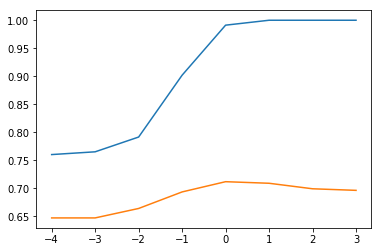

In [9]:
from sklearn.linear_model import LogisticRegression
def do_LOGIT(x,y,xv,yv, param):
    print("Param C= ",param)
    model= LogisticRegression()
    model.set_params(C=param)
    model.fit(x,y)
    train_acc = model.score(x,y)
    test_acc = model.score(xv,yv)
    return model, train_acc, test_acc
Cs = [10**i for i in np.arange(-4,4,dtype=float)]
Logit_models = []
logit_train_accs =[]
logit_test_accs =[]
for i in Cs:
    model, train_acc, test_acc = do_LOGIT(x = features_train, y = labels_train, xv = features_val, yv = labels_val, param = i)

    Logit_models.append(model)
    logit_train_accs.append(train_acc)
    logit_test_accs.append(test_acc)

    print("Train_acc = ", train_acc)
    print("Test_acc = ", test_acc)

    print('*' * 100)
plt.plot(np.arange(-4,4,dtype=float), logit_train_accs)
plt.plot(np.arange(-4,4,dtype=float), logit_test_accs)

El gráfico muestra como en los conjuntos de entrenamiento y prueba la precisión aumenta con el exponente del parámetro de regularización. Para el conjunto de entrenamiento se alcanza una precisión de 100%. En el conjunto de prueba se logra una máxima precisión cercana al 70% cuando lambda = 1. A medida que el valor de lambda aumenta sobre 1, la función de penalización 'castiga' la elección de múltiples atributos. Entonces ajustando su valor se puede manipular forzar al modelo a centrar su enfoque en una cantidad limitada de los atributos originales.

g) Entrene una Máquina de Soporte Vectorial (SVM) con distintos kernels. Similar a lo anterior, construya un gráfico que muestre la variación de ambos errores respecto al parámetro de regularización C para cada tipo de kernel que experimente. Explique el significado y valor esperado de los parámetros en este modelo.

Param C=  0.0001 Kernel=  linear
Train_acc =  0.5001758705592684
Test_acc =  0.509142053445851
****************************************************************************************************
Param C=  0.001 Kernel=  linear
Train_acc =  0.5001758705592684
Test_acc =  0.509142053445851
****************************************************************************************************
Param C=  0.01 Kernel=  linear
Train_acc =  0.7502638058389026
Test_acc =  0.6371308016877637
****************************************************************************************************
Param C=  0.1 Kernel=  linear
Train_acc =  0.9497010200492437
Test_acc =  0.6919831223628692
****************************************************************************************************
Param C=  1.0 Kernel=  linear
Train_acc =  0.9989447766443897
Test_acc =  0.6891701828410689
****************************************************************************************************
Param C=  10.0 Kernel=  li

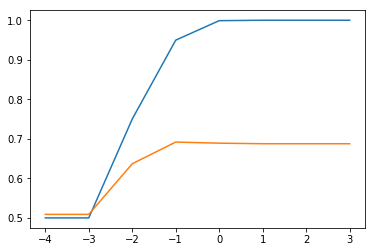

In [10]:
from sklearn.svm import SVC as SVM #SVC is for classification
def do_SVM(x,y,xv,yv, param, kernel='linear'):
    print("Param C= ",param, 'Kernel= ', kernel)
    model= SVM()
    model.set_params(C=param,kernel=kernel) #try rbf and linear at least
    model.fit(x,y)
    train_acc = model.score(x,y)
    test_acc = model.score(xv,yv)
    return model, train_acc, test_acc
Cs = [10**i for i in np.arange(-4,4,dtype=float)]
SVM_models = []
SVM_train_accs =[]
SVM_test_accs =[]
for i in Cs:
    model, train_acc, test_acc = do_SVM(x = features_train, y = labels_train, xv = features_val, yv = labels_val, param = i,kernel="linear")

    SVM_models.append(model)
    SVM_train_accs.append(train_acc)
    SVM_test_accs.append(test_acc)

    print("Train_acc = ", train_acc)
    print("Test_acc = ", test_acc)

    print('*' * 100)
plt.plot(np.arange(-4,4,dtype=float), SVM_train_accs)
plt.plot(np.arange(-4,4,dtype=float), SVM_test_accs)

La SVM con un kernel lineal alcanza una precisión máxima de 69.1% para C = 0.1. Lo anterior sugiere que el problema, aunque linealmente separable, aún sufre de un margen de error significativo con esta técnica de aprendizaje.

Param C=  0.0001 Kernel=  rbf
Train_acc =  0.5001758705592684
Test_acc =  0.509142053445851
****************************************************************************************************
Param C=  0.001 Kernel=  rbf
Train_acc =  0.5001758705592684
Test_acc =  0.509142053445851
****************************************************************************************************
Param C=  0.01 Kernel=  rbf
Train_acc =  0.5001758705592684
Test_acc =  0.509142053445851
****************************************************************************************************
Param C=  0.1 Kernel=  rbf
Train_acc =  0.5001758705592684
Test_acc =  0.509142053445851
****************************************************************************************************
Param C=  1.0 Kernel=  rbf
Train_acc =  0.5001758705592684
Test_acc =  0.509142053445851
****************************************************************************************************
Param C=  10.0 Kernel=  rbf
Train_acc =  0.5

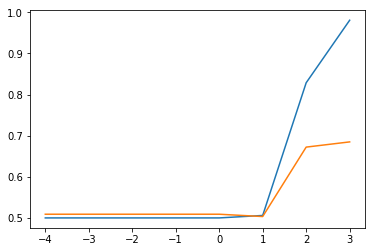

In [11]:
SVM_models = []
SVM_train_accs =[]
SVM_test_accs =[]
for i in Cs:
    model, train_acc, test_acc = do_SVM(x = features_train, y = labels_train, xv = features_val, yv = labels_val, param = i,kernel="rbf")

    SVM_models.append(model)
    SVM_train_accs.append(train_acc)
    SVM_test_accs.append(test_acc)

    print("Train_acc = ", train_acc)
    print("Test_acc = ", test_acc)

    print('*' * 100)
plt.plot(np.arange(-4,4,dtype=float), SVM_train_accs)
plt.plot(np.arange(-4,4,dtype=float), SVM_test_accs)

Al emplear el kernel de Función de Base Radial se llega a una precisión máxima de prueba de 68.4%. Este resultado es similar al obtenido con el kernel lineal. Sin embargo, la forma en la que se ajusta la precisión es diferente. Es posible que al aumenttar el parámetro C se obtenga una mejor precisión con este kernel.

h) Utilice el algoritmo de similaridad k-NN para intentar resolver el problema. Varíe el parámetro de los vecinos  k  en un rango que estime conveniente y realice graficos de errores como en las preguntas anteriores. Comente sobre el valor esperado de este parámetro.

Param K=  1
Train_acc =  1.0
Test_acc =  0.5893108298171589
****************************************************************************************************
Param K=  41
Train_acc =  0.6289131199437215
Test_acc =  0.5513361462728551
****************************************************************************************************
Param K=  81
Train_acc =  0.6169539219134716
Test_acc =  0.5457102672292545
****************************************************************************************************
Param K=  121
Train_acc =  0.6095673584241997
Test_acc =  0.5541490857946554
****************************************************************************************************
Param K=  161
Train_acc =  0.5705240942666198
Test_acc =  0.5710267229254571
****************************************************************************************************
Param K=  201
Train_acc =  0.5986633837495603
Test_acc =  0.5443037974683544
****************************************************

Train_acc =  0.5054519873373198
Test_acc =  0.49226441631504925
****************************************************************************************************
Param K=  1881
Train_acc =  0.5058037284558565
Test_acc =  0.49226441631504925
****************************************************************************************************
Param K=  1921
Train_acc =  0.5058037284558565
Test_acc =  0.4964838255977497
****************************************************************************************************
Param K=  1961
Train_acc =  0.5040450228631727
Test_acc =  0.49507735583684953
****************************************************************************************************
Param K=  2001
Train_acc =  0.5001758705592684
Test_acc =  0.4908579465541491
****************************************************************************************************
Param K=  2041
Train_acc =  0.5012310939148786
Test_acc =  0.48945147679324896
**************************************

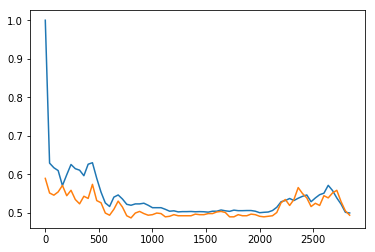

In [12]:
from sklearn.neighbors import KNeighborsClassifier
def do_KNN(x,y,xv,yv, param):
    model = KNeighborsClassifier()
    print("Param K= ",param)
    model.set_params(n_neighbors=param)
    model.fit(x,y)
    train_acc = model.score(x,y)
    test_acc = model.score(xv,yv)
    return model, train_acc, test_acc
Ks = np.arange(1, features_train.shape[0], 40)
KNN_train_accs =[]
KNN_test_accs =[]

for i in Ks:
    model, train_acc, test_acc = do_KNN(x = features_train, y = labels_train, xv = features_val, yv = labels_val, param = i)
    KNN_train_accs.append(train_acc)
    KNN_test_accs.append(test_acc)
    print("Train_acc = ", train_acc)
    print("Test_acc = ", test_acc)
    print('*' * 100)
plt.plot(Ks, KNN_train_accs)
plt.plot(Ks, KNN_test_accs)

Inicialmente la precisión de entrenamiento varía significativamente con el valor K. La precisión en el conjunto de prueba es comparativamente más estable, aunque también experimenta cierta fluctuación. La mejor precisión obtenida fue 58.9% para K=1 (conjunto de prueba). A priori k-NN no espera una mejora en la tasa de error con el aumento del valor de K. En efecto, el gráfico muestra como la "regularización" de la solución al aumentar el parámetro no entrega mejoras en la precisión del modelo.

i) Entrene un Arbol de Decisión para resolver el problema. Varíe los parámetros de max depth y min samples split de manera separada, constuyendo gráficos de error respecto a estos parámetros. Los valores que se presentan son sugerencias, no es necesario utilizar los mismos. Comente sobre la diferencia entre la selección de estos dos parámetros.

Param Max-D=  1 Min-samples-S=  20
Train_acc =  0.515300738656349
Test_acc =  0.510548523206751
****************************************************************************************************
Param Max-D=  151 Min-samples-S=  20
Train_acc =  0.8730214562082308
Test_acc =  0.6019690576652602
****************************************************************************************************
Param Max-D=  301 Min-samples-S=  20
Train_acc =  0.9342244108336265
Test_acc =  0.5836849507735584
****************************************************************************************************
Param Max-D=  451 Min-samples-S=  20
Train_acc =  0.9370383397819205
Test_acc =  0.6033755274261603
****************************************************************************************************
Param Max-D=  601 Min-samples-S=  20
Train_acc =  0.9300035174111854
Test_acc =  0.5921237693389592
****************************************************************************************************

Train_acc =  0.9310587407667956
Test_acc =  0.6104078762306611
****************************************************************************************************
Param Max-D=  6301 Min-samples-S=  20
Train_acc =  0.9342244108336265
Test_acc =  0.6104078762306611
****************************************************************************************************
Param Max-D=  6451 Min-samples-S=  20
Train_acc =  0.9349278930707
Test_acc =  0.5991561181434599
****************************************************************************************************
Param Max-D=  6601 Min-samples-S=  20
Train_acc =  0.9335209285965529
Test_acc =  0.60056258790436
****************************************************************************************************
Param Max-D=  6751 Min-samples-S=  20
Train_acc =  0.9307069996482589
Test_acc =  0.60056258790436
****************************************************************************************************
Param Max-D=  6901 Min-samples-S=  

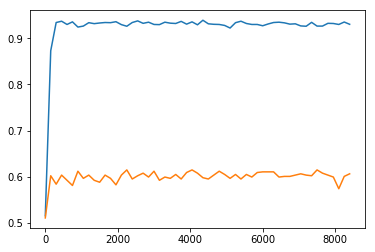

In [14]:
from sklearn.tree import DecisionTreeClassifier as Tree
def do_Tree(x,y,xv,yv, param_d=None, param_m=2):
    model= Tree()
    print("Param Max-D= ",param_d, 'Min-samples-S= ', param_m)
    model.set_params(max_depth=param_d, min_samples_split=param_m) 
    model.fit(x,y)
    train_acc = model.score(x,y)
    test_acc = model.score(xv,yv)
    return model, train_acc, test_acc

Depths = np.arange(1, features_train.shape[1], 150 ) #choose steps
SamplesS = np.arange(2, features_train.shape[0] , 10 ) #choose steps
Tree_train_accsD =[]
Tree_test_accsD =[]
Tree_train_accsS =[]
Tree_test_accsS =[]
maximo=0.0
act=0

for i in Depths:
    model, train_acc, test_acc = do_Tree(x = features_train, y = labels_train, xv = features_val, yv = labels_val, param_d = i, param_m=20)
    Tree_train_accsD.append(train_acc)
    Tree_test_accsD.append(test_acc)
    if(test_acc > act):
      act=test_acc
      maximo=i
    print("Train_acc = ", train_acc)
    print("Test_acc = ", test_acc)
    print('*' * 100)

plt.plot(Depths, Tree_train_accsD)
plt.plot(Depths, Tree_test_accsD)
print(maximo)


El gráfico muestra el cambio en la tasa de precisión según el parámetro D. Modificar la profundidad máxima del árbol no representa un cambio significativo respecto a 60% de precisión una vez sobre D = 151. Esto sugiere que un número mayor de posibles decisiones no limita la capacidad de predicción del modelo. 

2251
Param Max-D=  2251 Min-samples-S=  2
Train_acc =  1.0
Test_acc =  0.6104078762306611
****************************************************************************************************
Param Max-D=  2251 Min-samples-S=  12
Train_acc =  0.9497010200492437
Test_acc =  0.5921237693389592
****************************************************************************************************
Param Max-D=  2251 Min-samples-S=  22
Train_acc =  0.9257826239887443
Test_acc =  0.5977496483825597
****************************************************************************************************
Param Max-D=  2251 Min-samples-S=  32
Train_acc =  0.9120647203658108
Test_acc =  0.5991561181434599
****************************************************************************************************
Param Max-D=  2251 Min-samples-S=  42
Train_acc =  0.8955328877945832
Test_acc =  0.60056258790436
****************************************************************************************************
Par

Train_acc =  0.8223707351389378
Test_acc =  0.5991561181434599
****************************************************************************************************
Param Max-D=  2251 Min-samples-S=  422
Train_acc =  0.8199085473091804
Test_acc =  0.6061884669479606
****************************************************************************************************
Param Max-D=  2251 Min-samples-S=  432
Train_acc =  0.8132254660569821
Test_acc =  0.6075949367088608
****************************************************************************************************
Param Max-D=  2251 Min-samples-S=  442
Train_acc =  0.8146324305311291
Test_acc =  0.6019690576652602
****************************************************************************************************
Param Max-D=  2251 Min-samples-S=  452
Train_acc =  0.8329229686950405
Test_acc =  0.6075949367088608
****************************************************************************************************
Param Max-D=  2251 Min-s

Train_acc =  0.7492085824832923
Test_acc =  0.60056258790436
****************************************************************************************************
Param Max-D=  2251 Min-samples-S=  832
Train_acc =  0.7379528666901161
Test_acc =  0.6033755274261603
****************************************************************************************************
Param Max-D=  2251 Min-samples-S=  842
Train_acc =  0.7488568413647555
Test_acc =  0.6061884669479606
****************************************************************************************************
Param Max-D=  2251 Min-samples-S=  852
Train_acc =  0.7541329581428069
Test_acc =  0.60056258790436
****************************************************************************************************
Param Max-D=  2251 Min-samples-S=  862
Train_acc =  0.7414702778754837
Test_acc =  0.6033755274261603
****************************************************************************************************
Param Max-D=  2251 Min-sampl

Train_acc =  0.6950404502286317
Test_acc =  0.5864978902953587
****************************************************************************************************
Param Max-D=  2251 Min-samples-S=  1252
Train_acc =  0.6939852268730214
Test_acc =  0.5893108298171589
****************************************************************************************************
Param Max-D=  2251 Min-samples-S=  1262
Train_acc =  0.6982061202954626
Test_acc =  0.5808720112517581
****************************************************************************************************
Param Max-D=  2251 Min-samples-S=  1272
Train_acc =  0.6975026380583891
Test_acc =  0.5836849507735584
****************************************************************************************************
Param Max-D=  2251 Min-samples-S=  1282
Train_acc =  0.694688709110095
Test_acc =  0.5822784810126582
****************************************************************************************************
Param Max-D=  2251 Mi

Train_acc =  0.6426310235666549
Test_acc =  0.5780590717299579
****************************************************************************************************
Param Max-D=  2251 Min-samples-S=  1672
Train_acc =  0.6405205768554344
Test_acc =  0.5794655414908579
****************************************************************************************************
Param Max-D=  2251 Min-samples-S=  1682
Train_acc =  0.6405205768554344
Test_acc =  0.5794655414908579
****************************************************************************************************
Param Max-D=  2251 Min-samples-S=  1692
Train_acc =  0.6405205768554344
Test_acc =  0.5794655414908579
****************************************************************************************************
Param Max-D=  2251 Min-samples-S=  1702
Train_acc =  0.6405205768554344
Test_acc =  0.5794655414908579
****************************************************************************************************
Param Max-D=  2251 M

Train_acc =  0.5694688709110095
Test_acc =  0.5639943741209564
****************************************************************************************************
Param Max-D=  2251 Min-samples-S=  2082
Train_acc =  0.5694688709110095
Test_acc =  0.5639943741209564
****************************************************************************************************
Param Max-D=  2251 Min-samples-S=  2092
Train_acc =  0.5694688709110095
Test_acc =  0.5639943741209564
****************************************************************************************************
Param Max-D=  2251 Min-samples-S=  2102
Train_acc =  0.5694688709110095
Test_acc =  0.5639943741209564
****************************************************************************************************
Param Max-D=  2251 Min-samples-S=  2112
Train_acc =  0.5694688709110095
Test_acc =  0.5639943741209564
****************************************************************************************************
Param Max-D=  2251 M

Train_acc =  0.5525852972212452
Test_acc =  0.5513361462728551
****************************************************************************************************
Param Max-D=  2251 Min-samples-S=  2582
Train_acc =  0.5525852972212452
Test_acc =  0.5513361462728551
****************************************************************************************************
Param Max-D=  2251 Min-samples-S=  2592
Train_acc =  0.5525852972212452
Test_acc =  0.5513361462728551
****************************************************************************************************
Param Max-D=  2251 Min-samples-S=  2602
Train_acc =  0.5525852972212452
Test_acc =  0.5513361462728551
****************************************************************************************************
Param Max-D=  2251 Min-samples-S=  2612
Train_acc =  0.5525852972212452
Test_acc =  0.5513361462728551
****************************************************************************************************
Param Max-D=  2251 M

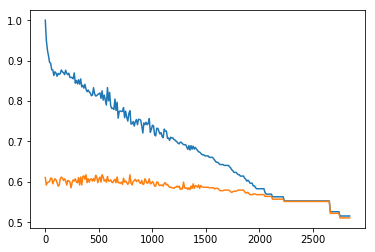

In [15]:
print(maximo)
Tree_train_accsD =[]
Tree_test_accsD =[]
Tree_train_accsS =[]
Tree_test_accsS =[]
for i in SamplesS:
    model, train_acc, test_acc = do_Tree(x = features_train, y = labels_train, xv = features_val, yv = labels_val, param_d = maximo, param_m=i)
    Tree_train_accsS.append(train_acc)
    Tree_test_accsS.append(test_acc)
    print("Train_acc = ", train_acc)
    print("Test_acc = ", test_acc)
    print('*' * 100)

plt.plot(SamplesS, Tree_train_accsS)
plt.plot(SamplesS, Tree_test_accsS)


El gráfico muestra el porcentaje de aciertos en función del parámetro S con D igual al mejor resultado obtenido en el apartado anterior. Se observa, en el conjunto de prueba, que luego de S = 1000 la precisión comienza a disminuir consistentemente bajo 60%. Se especula entonces que el modelo pierde resolución en su distinción sobre diferentes casos al verse forzado a aumentar el tamaño de las regiones del árbol. Sobre S = 2650 la precisión disminuye rápidamente bajo 55%. La tasa de éxito obtenida es cercana al azar, por lo que no resulta particularmente útil para resolver este problema.

j) Utilice una Red Neuronal Artificial (ANN) para intentar resolver el problema, como la que se señala a continuación (utilizando el framework de keras): entrenada por 25 iteraciones al dataset (epochs) con un tamaño de batch de 128 para las actualizaciones de los pesos, utilizando SGD con una tasa de aprendizaje  0.1  sobre la función de pérdida binaria de clasificación. La arquitectura de la red contiene una capa de salida con una única neurona que indica la probabilidad de que el texto sea positivo, una capa escondida con número de neuronas  Nh  y la capa de entrada implícita para  x . Varíe el parámetro que corresponde al número de neuronas en la capa oculta  Nh , en potencias de 2, y vuelva a realizar el gráfico de error con respecto al parámetro. Comente.

Neuron hidden =  2
Train_acc =  0.7333802323378269
Test_acc =  0.6300984529670951
****************************************************************************************************
Neuron hidden =  4
Train_acc =  0.7326767498072377
Test_acc =  0.618846694879894
****************************************************************************************************
Neuron hidden =  8
Train_acc =  0.7499120646994004
Test_acc =  0.6329113924888954
****************************************************************************************************
Neuron hidden =  16
Train_acc =  0.706296165916981
Test_acc =  0.6090014067212572
****************************************************************************************************
Neuron hidden =  32
Train_acc =  0.684136475595923
Test_acc =  0.6019690578329244
****************************************************************************************************
Neuron hidden =  64
Train_acc =  0.5008793528173073
Test_acc =  0.509142053487767
****

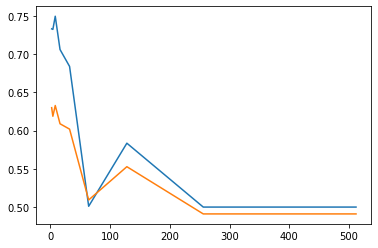

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
def do_ANN(x,y, xv,yv, param):
    print("Neuron hidden = ",param)
    model = Sequential()
    model.add(Dense(units=param, input_dim=x.shape[1], activation="sigmoid"))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(optimizer=SGD(lr=0.1), loss="binary_crossentropy", metrics=["accuracy"])
    model.fit(x, y, epochs=25, batch_size=128, verbose=0)
    train_acc = model.evaluate(x,y, verbose=0)[1] #in position 0 is the loss
    test_acc = model.evaluate(xv,yv, verbose=0)[1]
    return model, train_acc, test_acc
N_h = [2**i for i in range(1,10)]
ANN_train_accs =[]
ANN_test_accs =[]

for i in N_h:
    model, train_acc, test_acc = do_ANN(x = features_train, y = labels_train, xv = features_val, yv = labels_val, param=i)
    ANN_train_accs.append(train_acc)
    ANN_test_accs.append(test_acc)
    print("Train_acc = ", train_acc)
    print("Test_acc = ", test_acc)
    print('*' * 100)

plt.plot(N_h, ANN_train_accs)
plt.plot(N_h, ANN_test_accs)

La tasa de error de la red aumenta significativamente luego de superar las 32 capas. Su máximo de 63.2% se alcanza con 16 capas ocultas. Es posible que no hayan suficientes datos disponibles para suplir la complejidad de un mayor número de capas, por lo que al aumentar su cantidad el modelo pierde precisión. Para los casos de 128, 256 y 512 capas la tasa de error cambia ligeramente. No obstante, la precisión del modelo en dichos puntos se situa casi exactamente sobre 50%, lo cual no representa un resultado útil para la solución del problema.

k) Ahora evalúe sobre el conjunto de pruebas el mejor modelo obtenido, seleccionado en base a la métrica de desempeño en el conjunto de validación. Comente sobre la calidad obtenida en el problema trabajado ¿Es un buen valor? ¿Cuál podría ser un valor de referencia?

In [16]:

from sklearn.linear_model import LogisticRegression
def do_LOGIT(x,y,xv,yv, param):
    print("Param C= ",param)
    model= LogisticRegression()
    model.set_params(C=param)
    model.fit(x,y)
    train_acc = model.score(x,y)
    test_acc = model.score(xv,yv)
    return model, train_acc, test_acc


model, train_acc, test_acc = do_LOGIT(x = original_features_train, y = original_labels_train, xv = features_test, yv = labels_test, param = 1.0)

print("Train_acc = ", train_acc)
print("Test_acc = ", test_acc)


Param C=  1.0
Train_acc =  0.9850872256612268
Test_acc =  0.7228474957794034


El mejor valor obtenido previamente fue 70% de precisión con el modelo de Regresión Logística Regularizado. Con el conjunto de prueba se obtiene una precisión de 72%. Considerando el primer valor citado, el desempeño observado es bueno. 

l) Para comparar sus resultados utilice el modelo VADER (Valence Aware Dictionary and sEntiment Reasoner) [6], el cual entrega una score de predicción a nivel léxico (de palabras que comúnmente se asocian a una orientiación positiva o negativa). Este modelo construido manualmente no requiere entrenamiento, por lo que solo debe evaluar en conjunto de pruebas realizando predicciones del texto bruto (sin pre-procesamiento). Comente.

In [17]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 
def vader_predict(sentences): 
    sid_obj = SentimentIntensityAnalyzer() 
    sent_v = []
    for text in sentences:
        sentiment_dict = sid_obj.polarity_scores(text) 
        if sentiment_dict["pos"] > sentiment_dict["neg"]: #based on scores
            sent_v.append(1)
        else:
            sent_v.append(0)
    return np.asarray(sent_v)
vader_pred_test = vader_predict(df_test_text) 
from sklearn.metrics import accuracy_score
accuracy_score(labels_test, vader_pred_test)

0.6359032076533483

VADER aunque no requiere entrenamiento, posee mejor desempeño (63% de aciertos) que el árbol de decisión (60%) y que el modelo de k-NN (58.9%). No obstante, el modelo de Regresión Logística Regularizado es más preciso.

m) Bajo la idea del modelo VADER realice un análisis de qué palabras su modelo tiende a considerar como positivas o negativas por si solas. Algunos de los modelos estudiados en esta sección realizan una predicción probabilista, utilice uno de éstos para verificar lo solicitado. Sobre la representación TF genere datos de entradas que contengan una sola palabra del vocabulario para evaluar que predicción les genera su modelo a esas palabras. Muestre las palabras más negativas y positivas en el vocabulario consideradas por su modelo. Comente.

In [18]:
V = len(vocab)
word_scores = np.zeros((V, 2))
maximo=0
minimo=1.1
indice_bueno=0
indice_malo=0

for i in range(V):
    x_word = np.zeros((1, V))
    x_word[:,i] = 1 # only the "i" word appeared
    word_scores[i] = model.predict_proba(x_word) #0 = malo ____ 1 = bueno
    if(word_scores[i][0]>maximo):
      maximo=word_scores[i][0]
      indice_malo=i
    if(word_scores[i][0]<minimo):
      minimo=word_scores[i][0]
      indice_bueno=i
    #print(vocab[i],word_scores[i])
#print(indice_bueno,vocab[indice_bueno],indice_malo,vocab[indice_malo])
positivas = word_scores[word_scores[:,0].argsort()]
negativas = word_scores[word_scores[:,1].argsort()]

negativas_pos = []
positivas_pos = []

lista_positivas = []
lista_negativas = []

for i in range(10):
    index_pos = np.where(word_scores == positivas[i])
    index_neg = np.where(word_scores == negativas[i])

    lista_positivas.append(vocab[index_pos[0][0]])
    lista_negativas.append(vocab[index_neg[0][0]])


print("10 palabras más positivas",lista_positivas)
print("10 palabras más negativas",lista_negativas)

10 palabras más positivas ['solid', 'enjoyable', 'heart', 'moving', 'ride', 'provides', 'rare', 'world', 'witty', 'wonderful']
10 palabras más negativas ['worst', 'boring', 'bad', 'pretentious', 'dull', 'heavy', 'silly', 'cliche', 'tv', 'fails']


El modelo aprendió a indentificar ciertas palabras que los humanos emplean para referirse positiva o negativamente a alguna obra, como 'wonderful', 'enoyable', 'bad' y 'boring'. No obstante, también califica a palabras como 'ride', 'world', 'tv' y  'heavy' como marcadores de una opinión, palabras que fuera de contexto no comunican una inclinación con la misma certeza que las mencionadas anteriormente. Es razonable atribuir la tasa de error del modelo a esta imprecisión en el aprendizaje.

n) Intente mejorar los resultados de otra manera. Varíe el pre-procesamiento realizado a los datos en c), por ejemplo eliminar símbolos, números o aplicar la técnica de stemmming en lugar de lemmatization para llevar a su tronco léxico.


In [19]:
from nltk.stem.porter import PorterStemmer

def base_word(word):
    wordstemmer = PorterStemmer()
    return wordstemmer.stem(word)
def word_extractor(text):
    commonwords = stopwords.words('english')
    text = re.sub(r'([a-z])\1+', r'\1\1',text) #substitute multiple letter by two
    words = ""
    wordtokens = [ base_word(word.lower()) for word in word_tokenize(text) ]
    #commonwords.remove("not") Esta palabra quita una posible polaridad de contexto, sin embargo no cambia en casi nada (0,003) el test accuracy
    for word in wordtokens:
        if word not in commonwords : #delete stopwords
            words+=" "+word
    return words

df_train_text_original = df_train.Text
df_test_text_original = df_test.Text
labels_train_original = df_train.Sentiment.values
labels_test_original = df_test.Sentiment.values

texts_train_original = [word_extractor(text) for text in df_train_text_original]
texts_test_original = [word_extractor(text) for text in df_test_text_original]

features_train_original = vectorizer.transform(texts_train_original)
features_test_original = vectorizer.transform(texts_test_original)

model, train_acc, test_acc = do_LOGIT(x = features_train_original, y = labels_train_original, xv = features_test_original, yv = labels_test_original, param = 1.0)

print("Train_acc = ", train_acc)
print("Test_acc = ", test_acc)

Param C=  1.0
Train_acc =  0.9102419808666291
Test_acc =  0.6907709622960045


Se reemplaza la técnica de lemmatization con stemming. El modelo es casi igualmente efectivo para identificar opiniones: de 70% a 69%.

o) Varíe la representación utilizada actualmente por alguna otra que ayude a mejorar el desempeño, por ejemplo reducir el peso de una palabra si es que aparece en muchos textos: TF-IDF. Existen varias opciones que podría realizar para mejorar el desempeño, por ejemplo reducir el vocabulario a las  K  palabras más frecuentes, eliminar las palabras menos frecuentes, normalizar la representación, utilizar n-gramas, entre otras.


In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_model = TfidfVectorizer(binary=False, ngram_range=(1, 1), max_df=1.0, min_df=1, max_features=None, norm='l2', use_idf=True, sublinear_tf=False)
tfidf_model.fit(texts_train_original)

features_train_variado=tfidf_model.transform(texts_train_original)
features_test_variado=tfidf_model.transform(texts_test_original)

vocab = tfidf_model.get_feature_names()

model, train_acc, test_acc = do_LOGIT(x = features_train_variado, y = labels_train_original, xv = features_test_variado, yv = labels_test_original, param = 1.0)

print("Train_acc = ", train_acc)
print("Test_acc = ", test_acc)

Param C=  1.0
Train_acc =  0.9217782779966235
Test_acc =  0.7498593134496342


p) Utilice métricas auxiliares para entender en qué falla su mejor modelo obtenido hasta el momento. ¿La información entregada indica cómo se podría mejorar o cual sería la causa de la falla?


In [21]:
from sklearn.metrics import classification_report
def score_the_model(model, x, y):
    print("Detailed Analysis Testing Results ...")
    print(classification_report(y, model.predict(x), target_names=['caracter negativo','caracter positivo']))
score_the_model(model, features_test_variado, labels_test_original)
#Recall: Fraccion de positivos clasificados correctamente
#F1 Score: Promedio armónico entre recall y precisión. Mientras mas cerca de 1 mejor
#Precision: cantidad de casos identificados correctamente

Detailed Analysis Testing Results ...
                   precision    recall  f1-score   support

caracter negativo       0.75      0.76      0.75      1803
caracter positivo       0.75      0.74      0.74      1751

      avg / total       0.75      0.75      0.75      3554



El modelo muestra un precisión de 75% para identificar sentencias de carácter positivo y negativo. Los valores de recall y f-score soportan la observación que el modelo es efectivo para identificar sentencias de ambos tipos.

q) Algo que se puede modificar en algunos modelos de aprendizaje es poner peso en cada una de las clases, por ejemplo si una clase es de mayor interés que las otras e interesa reducir más su error. En sklearn ésto puede ser realizado con el parámetro de class_weights. Por ejemplo, asigne que detectar los textos negativos me interesa 5 veces más que detectar los textos positivos. Comente.


In [22]:
classes_weights = {0: 5, 1: 1} #or choose..
model.set_params(class_weight=classes_weights)
model.fit(features_train_variado, labels_train_original)
score_the_model(model, features_test_variado, labels_test)
#Recall: Fraccion de positivos clasificados correctamente
#F1 Score: Promedio armónico entre recall y precisión. Mientras mas cerca de 1 mejor
#Precision: cantidad de casos identificados correctamente

Detailed Analysis Testing Results ...
                   precision    recall  f1-score   support

caracter negativo       0.55      0.99      0.71      1803
caracter positivo       0.92      0.18      0.30      1751

      avg / total       0.73      0.59      0.51      3554



El modelo se volvió más propenso a catalogar los datos como negativos. Se observa que el puntaje de recall para las sentencias negativas es casi 1. Esto significa que el modelo se volvió muy cuidadoso para no emitir falsos negativos en la categoría de sentencias negativas. Lo anterior es logrado a costa de una baja en la precisión global del modelo: desde 75% a 59%.

r) Visualice la clasificación que realiza su mejor modelo sobre algunos textos de pruebas ¿Qué entega mas información, una predicción categórica o una continua? ¿Cuál podría ser el beneficio de una o de otra? Comente


In [23]:
classes_weights = {0: 1, 1: 1} #or choose..
model.set_params(class_weight=classes_weights)
model.fit(features_train_variado, labels_train_original)

test_pred = model.predict(features_test_variado) #or ".predict_proba"
spl = np.random.randint( 0, len(test_pred), size=15)
for text, pred_s, true_s in zip(df_test_text[spl], test_pred[spl], labels_test[spl]):
    print("True sent: ", true_s, "-- Pred sent: ",pred_s)
    print("Raw text: ", text)

True sent:  1.0 -- Pred sent:  0.0
Raw text:  fans of behan's work and of irish movies in general will be rewarded by borstal boy .

True sent:  1.0 -- Pred sent:  1.0
Raw text:  about a manga-like heroine who fights back at her abusers , it's energetic and satisfying if not deep and psychological .

True sent:  0.0 -- Pred sent:  0.0
Raw text:  deadeningly dull , mired in convoluted melodrama , nonsensical jargon and stiff-upper-lip laboriousness .

True sent:  0.0 -- Pred sent:  1.0
Raw text:  whenever its story isn't bogged down by idiocy involving the cia and a lost u . s . satellite , hunter -- starring irwin and his american wife/colleague , terri -- is a movie children should enjoy .

True sent:  1.0 -- Pred sent:  1.0
Raw text:  a pleasant romantic comedy .

True sent:  1.0 -- Pred sent:  1.0
Raw text:  benefits from a strong performance from zhao , but it's dong jie's face you remember at the end .

True sent:  0.0 -- Pred sent:  0.0
Raw text:  claims to sort the bad guys from

In [24]:
classes_weights = {0: 1, 1: 1} #or choose..
model.set_params(class_weight=classes_weights)
model.fit(features_train_variado, labels_train_original)

test_pred = model.predict_proba(features_test_variado) #or ".predict_proba"
spl = np.random.randint( 0, len(test_pred), size=15)
for text, pred_s, true_s in zip(df_test_text[spl], test_pred[spl], labels_test[spl]):
    print("True sent: ", true_s, "-- Pred sent: ",pred_s)
    print("Raw text: ", text)

True sent:  1.0 -- Pred sent:  [0.5044258 0.4955742]
Raw text:  inside the film's conflict-powered plot there is a decent moral trying to get out , but it's not that , it's the tension that keeps you in your seat . affleck and jackson are good sparring partners .

True sent:  0.0 -- Pred sent:  [0.72193042 0.27806958]
Raw text:  attempts by this ensemble film to impart a message are so heavy-handed that they instead pummel the audience .

True sent:  0.0 -- Pred sent:  [0.63164004 0.36835996]
Raw text:  has nothing good to speak about other than the fact that it is relatively short , tries its best to hide the fact that seagal's overweight and out of shape .

True sent:  1.0 -- Pred sent:  [0.41024052 0.58975948]
Raw text:  a sensitive and astute first feature by anne-sophie birot .

True sent:  0.0 -- Pred sent:  [0.69342776 0.30657224]
Raw text:  the movie is a little tired ; maybe the original inspiration has run its course .

True sent:  0.0 -- Pred sent:  [0.57197274 0.42802726]
R

Ocasionalmente el modelo asigna probabilidades muy similares para los casos negativos y positivos. La predicción categórica es un tanto deceptoria en estos casos. La predicción discreta parece ser superior en todos los ámbitos relevantes. Permite discernir cuáles predicciones son '50/50' para el modelo y permite ver el grado de certeza que el modelo tiene respecto a sus predicciones.

s) Comente sobre el desempeño obtenido por los diferentes modelos de aprendizaje utilizados al enfrentar el problema, ¿Dónde pareciera estar la mejora? ¿En la variación de los modelos y sus parámetros o en la modificación de la representación? ¿Cuál modelo de aprendizaje le parece mejor en base a su criterio? ya sea desempeño, tiempo de ejecución comodidad en las decisiones involucradas, etc.

Los diferentes modelos empleados varían su porcentaje de aciertos entre el 50 y el 60%. El modelo seleccionado fue el de Regresión Logística Regularizado. Su versión óptima de 70% de precisión se pierde sin el valor de parámetro correcto. Respecto a la representacion, el cambio significó una mejora negligible de 3% en la precisión del modelo. Lo anterior sugiere que tanto la elección del modelo apropiado como el parámetro óptimo son los factores que determinan el mejor método de resolución. Otro factor destacable del método de Regresión Logística es su tiempo de ejecución. Relativo a algunas de las otras técnicas, como la Red Neuronal, la regresión es significativamente más rápida cuando la cantidad de capas de la red comienza a aumentar. A pesar de esto es el potencial de una Red Neuronal como solución es digno de mención. Un mayor volumen de datos podría permitir a la red aprender un modelo más sofisticado para evitar algunos de los errores de aprendizaje padecidos por el modelo de Regresión Logística, tales como palabras comunmente neutrales calificadas como más 'positivas' o 'negativas'.

 Considerando el grado de precisión alcanzado de 70% sería posible argumentar que aún se tiene un márgen importante de error. Sin embargo, como un acercamiento al Sentiment Analysis el resultado obtenido tiene un aceptable índice de éxito.


<a id="segundo"></a>
## 2. Problema de Múltiples Anotaciones

El aprendizaje supervisado visto en clases da cuenta que existe una única posible etiqueta $z$ (*ground truth*) asociada a un dato $x$ para poder aprender de los datos. Sin embargo, la definición del *ground truth* en algunos casos puede resultar bastante difícil de definir o bastante costoso, por ejemplo en problemas médicos donde se deben realizar invasivos exámenes para conocer la "verdad absoluta". Como alternativa se pueden recolectar múltiples anotaciones desde personas inexpertas en el área para poder estimar el *ground truth*. 

<img src="http://www.irishenvironment.com/wp-content/uploads/2013/11/crowdsourcing.jpg" title="Title text" width="40%" />

En esta actividad se trabajará en el caso en que contamos con múltiples anotaciones por cada dato de entrada $x_i$ dadas por personas inexpertas a través de Amazon Mechanical Turk (__[AMT](https://www.mturk.com/)__), es decir, $y^{(1)}, y^{(2)} \ldots y^{(T_i)}$. El problema de predicción trabajado será el mismo de la actividad anterior, el análisis de sentimiento de un extracto de texto en Rotten Tomatoes. Los datos trabajados [[8]](#refs) pueden ser descargados de la página del autor.
```
wget http://fprodrigues.com//mturk-datasets.tar.gz
```

De esta manera trabajaremos con el archivo *mturk_answers.csv* en la carpeta *sentiment polarity* que se puede cargar con pandas. En este archivo se tendrán múltiples filas/registros por cada dato de entrenamiento, cada uno representando la etiqueta que entregó una persona (*worker*) a ese dato, los detalles de columnas son:
* *WorkerId*: identificador de la persona que etiquetó/anotó el dato
* *Input.id*: identificador del dato a etiquetar/anotar
* *Input.original_sentence*: texto original del dato
* *Input.stemmed_sent*: texto pre-procesado
* *Input.true_sent*: sentimiento real (*ground truth*) del dato
* *Answer.sent*:   etiqueta/anotación que entregó la persona

```python
import pandas as pd
df = pd.read_csv("./sentiment_polarity/mturk_answers.csv") 
```

> El objetivo de la actividad será el de obtener un modelo predictor del *ground truth* sin entrenar directamente con esto, sino que utilizar las múltiples anotaciones de las personas

### Importante
* Deberá crear un conjunto aleatorio de pruebas que solo contenga los textos y el sentimiento *ground truth* (sin repeticiones)
* Los valores de *ground truth* están **solo para evaluar**, no puede utilizarlos para entrenar o tomar decisiones en su modelo.
* La métrica de evaluación será el *accuracy score*
```python
from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_pred)
```

#### Sugerencias
Para representar los textos, a diferencia de lo visto en la sección 1, se puede utilizar lo que son la representación vectorial de palabras (*word vectors*), a través de modelos especializados entrenados para aprender una representación en que palabras similares estén cercanas en el espacio vectorial. Puede utilizar los vectores livianos de __[GLOVE](https://nlp.stanford.edu/projects/glove/)__ en su versión entradas en textos de Wikipedia con 6 billones de palabras/tokens.
```python
EMBEDDING_DIM = 300
GLOVE_FILE = "./glove.6B.%dd.txt"%(EMBEDDING_DIM)
embeddings_index = {}
with open(GLOVE_FILE) as file:
    for line in file:
        values = line.split()
        embeddings_index[values[0]] = np.asarray(values[1:], dtype='float32')
...
embeddings_index.get(word)
```
> Para descargar GLOVE
```
wget http://nlp.stanford.edu/data/glove.6B.zip
```

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [26]:
data_frame = pd.read_csv("mturk_answers.csv")

Se carga el archivo en un data frame de Pandas

In [28]:
dicc=dict()
for index,row in data_frame.iterrows():
    if(row["Input.id"] not in dicc.keys()):
        dicc[row["Input.id"]]=[0,0,row["Input.stemmed_sent"],row["Input.true_sent"]]
    if(row["Input.id"] in dicc.keys()):
        if(row["Answer.sent"]=="neg"):
            dicc[row["Input.id"]][0]+=1
        else:
            dicc[row["Input.id"]][1]+=1

datos=[]            
for k,v in dicc.items():
    if(v[0]>v[1]):
        datos.append([v[2],"neg",v[3]])
    else:
        datos.append([v[2],"pos",v[3]])
data_prom = pd.DataFrame(datos, columns = ['Input.stemmed_sent', 'Answer.sent','Input.true_sent']) 

Esta seccion de codigo toma todas las reviews, por cada id de pelicula se guarda en un diccionario. Despues de recorrer todo el data set, por cada pelicula se calcula si la opinion fue mas positiva o negativa, y se crea un nuevo data set con los datos tal que no se repitan peliculas.

In [29]:
cont=0
div=0
for index,row in data_frame.iterrows():
    div+=1
    if(row['Input.true_sent']==row['Answer.sent']):
        cont+=1
print("Accuracy humana con datos repetidos: ",cont/div)
cont=0
div=0
for index,row in data_prom.iterrows():
    div+=1
    if(row['Input.true_sent']==row['Answer.sent']):
        cont+=1
print("Accuracy humana sin datos repetidos: ",cont/div)

Accuracy humana con datos repetidos:  0.7894831687450443
Accuracy humana sin datos repetidos:  0.8821764352870574


Se calcula el accuracy humano para el data set con datos repetidos y no repetidos

In [30]:
df_train_text=data_frame["Input.stemmed_sent"]
labels_train_real=data_frame["Input.true_sent"]
labels_train_enviados=data_frame["Answer.sent"]

In [31]:
from sklearn.model_selection import train_test_split
texts_train, texts_val, labels_train, labels_val  = train_test_split(df_train_text, labels_train_enviados,test_size= 0.2, random_state=0)

Se separa en conjunto de validacion y train

In [33]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
original_set = np.concatenate((texts_train, texts_val))
vectorizer = CountVectorizer(ngram_range=(1, 1), binary=False) #TF representation
vectorizer.fit(texts_train)
features_train = vectorizer.transform(texts_train)
features_val = vectorizer.transform(texts_val)
features_real= vectorizer.transform(original_set)

Se vectorizan los textos

#### Maquinas de aprendizaje con el data set completo

Param C=  0.0001
Train_acc =  0.5347810416291223
Test_acc =  0.5441441441441441
Accuracy respecto al Ground Truth =  0.49956750522597854
****************************************************************************************************
Param C=  0.001
Train_acc =  0.5939358442962696
Test_acc =  0.5846846846846847
Accuracy respecto al Ground Truth =  0.4993512578389678
****************************************************************************************************
Param C=  0.01
Train_acc =  0.7322941070463147
Test_acc =  0.7
Accuracy respecto al Ground Truth =  0.5033518344986665
****************************************************************************************************
Param C=  0.1
Train_acc =  0.7980266714723374
Test_acc =  0.7515315315315315
Accuracy respecto al Ground Truth =  0.5054782671376055
****************************************************************************************************
Param C=  1.0
Train_acc =  0.827536493061813
Test_acc =  0.7679279279279

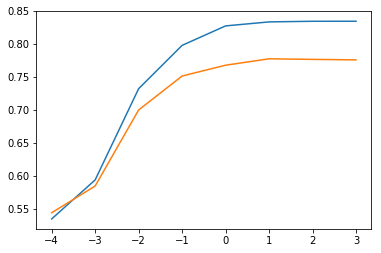

In [34]:
from sklearn.linear_model import LogisticRegression
def do_LOGIT(x,y,xv,yv, param):
    print("Param C= ",param)
    model= LogisticRegression()
    model.set_params(C=param)
    model.fit(x,y)
    train_acc = model.score(x,y)
    test_acc = model.score(xv,yv)
    return model, train_acc, test_acc
Cs = [10**i for i in np.arange(-4,4,dtype=float)]
Logit_models = []
logit_train_accs =[]
logit_test_accs =[]
for i in Cs:
    model, train_acc, test_acc = do_LOGIT(x = features_train, y = labels_train, xv = features_val, yv = labels_val, param = i)

    Logit_models.append(model)
    logit_train_accs.append(train_acc)
    logit_test_accs.append(test_acc)

    pred_original = model.predict(features_real)
    print("Train_acc = ", train_acc)
    print("Test_acc = ", test_acc)
    print("Accuracy respecto al Ground Truth = ",accuracy_score(labels_train_real, pred_original))

    print('*' * 100)
plt.plot(np.arange(-4,4,dtype=float), logit_train_accs)
plt.plot(np.arange(-4,4,dtype=float), logit_test_accs)

Param C=  0.0001 Kernel=  linear
Train_acc =  0.5324382771670572
Test_acc =  0.5423423423423424
Accuracy respecto al Ground Truth =  0.49978375261298924
****************************************************************************************************
Param C=  0.001 Kernel=  linear
Train_acc =  0.5345557758154622
Test_acc =  0.543963963963964
Accuracy respecto al Ground Truth =  0.4994233403013047
****************************************************************************************************
Param C=  0.01 Kernel=  linear
Train_acc =  0.7405838889890071
Test_acc =  0.7063063063063063
Accuracy respecto al Ground Truth =  0.505045772363584
****************************************************************************************************
Param C=  0.1 Kernel=  linear
Train_acc =  0.810596503874572
Test_acc =  0.7618018018018018
Accuracy respecto al Ground Truth =  0.5030274634181504
*************************************************************************************************

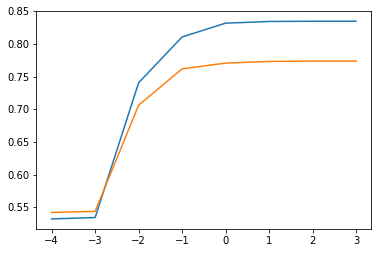

In [36]:
from sklearn.svm import SVC as SVM #SVC is for classification
def do_SVM(x,y,xv,yv, param, kernel='linear'):
    print("Param C= ",param, 'Kernel= ', kernel)
    model= SVM()
    model.set_params(C=param,kernel=kernel) #try rbf and linear at least
    model.fit(x,y)
    train_acc = model.score(x,y)
    test_acc = model.score(xv,yv)
    return model, train_acc, test_acc
Cs = [10**i for i in np.arange(-4,4,dtype=float)]
SVM_models = []
SVM_train_accs =[]
SVM_test_accs =[]
for i in Cs:
    model, train_acc, test_acc = do_SVM(x = features_train, y = labels_train, xv = features_val, yv = labels_val, param = i,kernel="linear")

    SVM_models.append(model)
    SVM_train_accs.append(train_acc)
    SVM_test_accs.append(test_acc)

    pred_original = model.predict(features_real)
    print("Train_acc = ", train_acc)
    print("Test_acc = ", test_acc)
    print("Accuracy respecto al Ground Truth = ",accuracy_score(labels_train_real, pred_original))
    print('*' * 100)
plt.plot(np.arange(-4,4,dtype=float), SVM_train_accs)
plt.plot(np.arange(-4,4,dtype=float), SVM_test_accs)

In [0]:
from sklearn.neighbors import KNeighborsClassifier
def do_KNN(x,y,xv,yv, param):
    model = KNeighborsClassifier()
    print("Param K= ",param)
    model.set_params(n_neighbors=param)
    model.fit(x,y)
    train_acc = model.score(x,y)
    test_acc = model.score(xv,yv)
    return model, train_acc, test_acc
Ks = np.arange(1, features_train.shape[0], 40)
KNN_train_accs =[]
KNN_test_accs =[]

for i in Ks:
    model, train_acc, test_acc = do_KNN(x = features_train, y = labels_train, xv = features_val, yv = labels_val, param = i)
    KNN_train_accs.append(train_acc)
    KNN_test_accs.append(test_acc)
    pred_original = model.predict(features_real)
    print("Train_acc = ", train_acc)
    print("Test_acc = ", test_acc)
    print("Accuracy respecto al Ground Truth = ",accuracy_score(labels_train_real, pred_original))
plt.plot(Ks, KNN_train_accs)
plt.plot(Ks, KNN_test_accs)

In [0]:
from sklearn.tree import DecisionTreeClassifier as Tree
def do_Tree(x,y,xv,yv, param_d=None, param_m=2):
    model= Tree()
    print("Param Max-D= ",param_d, 'Min-samples-S= ', param_m)
    model.set_params(max_depth=param_d, min_samples_split=param_m) 
    model.fit(x,y)
    train_acc = model.score(x,y)
    test_acc = model.score(xv,yv)
    return model, train_acc, test_acc

Depths = np.arange(1, features_train.shape[1], 500 ) #choose steps
SamplesS = np.arange(2, features_train.shape[0] , 10 ) #choose steps
Tree_train_accsD =[]
Tree_test_accsD =[]
Tree_train_accsS =[]
Tree_test_accsS =[]
maximo=0.0
act=0

for i in Depths:
    model, train_acc, test_acc = do_Tree(x = features_train, y = labels_train, xv = features_val, yv = labels_val, param_d = i, param_m=20)
    Tree_train_accsD.append(train_acc)
    Tree_test_accsD.append(test_acc)
    if(test_acc > act):
      act=test_acc
      maximo=i
    pred_original = model.predict(features_real)
    print("Train_acc = ", train_acc)
    print("Test_acc = ", test_acc)
    print("Accuracy respecto al Ground Truth = ",accuracy_score(labels_train_real, pred_original))
    print('*' * 100)

plt.plot(Depths, Tree_train_accsD)
plt.plot(Depths, Tree_test_accsD)
print(maximo)


In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
def do_ANN(x,y, xv,yv, param):
    print("Neuron hidden = ",param)
    model = Sequential()
    model.add(Dense(units=param, input_dim=x.shape[1], activation="sigmoid"))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(optimizer=SGD(lr=0.1), loss="binary_crossentropy", metrics=["accuracy"])
    model.fit(x, y, epochs=25, batch_size=128, verbose=0)
    train_acc = model.evaluate(x,y, verbose=0)[1] #in position 0 is the loss
    test_acc = model.evaluate(xv,yv, verbose=0)[1]
    return model, train_acc, test_acc
N_h = [2**i for i in range(1,10)]
ANN_train_accs =[]
ANN_test_accs =[]

for i in N_h:
    model, train_acc, test_acc = do_ANN(x = features_train, y = labels_train, xv = features_val, yv = labels_val, param=i)
    ANN_train_accs.append(train_acc)
    ANN_test_accs.append(test_acc)
    pred_original = model.predict(features_real)
    print("Train_acc = ", train_acc)
    print("Test_acc = ", test_acc)
    print("Accuracy respecto al Ground Truth = ",accuracy_score(labels_train_real, pred_original))
    print('*' * 100)
plt.plot(N_h, ANN_train_accs)
plt.plot(N_h, ANN_test_accs)

In [0]:
df_train_text=data_prom["Input.stemmed_sent"]
labels_train_real=data_prom["Input.true_sent"]
labels_train_enviados=data_prom["Answer.sent"]

In [0]:
texts_train, texts_val, labels_train, labels_val  = train_test_split(df_train_text, labels_train_enviados,test_size= 0.2, random_state=0)

In [0]:
original_set = np.concatenate((texts_train, texts_val))
vectorizer = CountVectorizer(ngram_range=(1, 1), binary=False) #TF representation
vectorizer.fit(texts_train)
features_train = vectorizer.transform(texts_train)
features_val = vectorizer.transform(texts_val)
features_real= vectorizer.transform(original_set)

In [0]:
Cs = [10**i for i in np.arange(-4,4,dtype=float)]
Logit_models = []
logit_train_accs =[]
logit_test_accs =[]
for i in Cs:
    model, train_acc, test_acc = do_LOGIT(x = features_train, y = labels_train, xv = features_val, yv = labels_val, param = i)

    Logit_models.append(model)
    logit_train_accs.append(train_acc)
    logit_test_accs.append(test_acc)

    pred_original = model.predict(features_real)
    print("Train_acc = ", train_acc)
    print("Test_acc = ", test_acc)
    print("Accuracy respecto al Ground Truth = ",accuracy_score(labels_train_real, pred_original))

    print('*' * 100)
plt.plot(np.arange(-4,4,dtype=float), logit_train_accs)
plt.plot(np.arange(-4,4,dtype=float), logit_test_accs)

<a id="refs"></a>
## Referencias
[1] Keras: Deep Learning library for Theano and TensorFlow. https://keras.io/  
[2] https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews  
[3] https://en.wikipedia.org/wiki/Stopwords  
[4] https://en.wikipedia.org/wiki/Lemmatisation  
[5] Landauer, T. K., Foltz, P. W., & Laham, D. (1998). *An introduction to latent semantic analysis*. Discourse processes, 25(2-3), 259-284.  
[6] https://github.com/cjhutto/vaderSentiment  
[7] https://en.wikipedia.org/wiki/Stemming  
[8] Rodrigues, F., Pereira, F., & Ribeiro, B. (2013). *Learning from multiple annotators: distinguishing good from random labelers*. Pattern Recognition Letters, 34(12), 1428-1436.